In [85]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv
Saving test.csv to test.csv


In [89]:
# иморитирование всех необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [90]:
# Считываем тренировочные данные
train = pd.read_csv("train.csv")

print(f"Train dataset shape: {train.shape}")

Train dataset shape: (1000, 81)


In [91]:
# Считываем тренировочные данные
test = pd.read_csv("test.csv")

print(f"Test dataset shape: {test.shape}")

Test dataset shape: (460, 80)


In [92]:
train.head(
)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [93]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1001,20,RL,74.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
1,1002,30,RL,60.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2007,WD,Abnorml
2,1003,20,RL,75.0,11957,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
3,1004,90,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
4,1005,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal


In [94]:
display(train.isna().sum())
display(train.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      173
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      173
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [95]:
print("Number of missing values in train dataset:")
print(train.isna().sum())
print("Number of missing values in test dataset:")
print(test.isna().sum())

Number of missing values in train dataset:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      173
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Number of missing values in test dataset:
Id                0
MSSubClass        0
MSZoning          0
LotFrontage      86
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64


<Axes: >

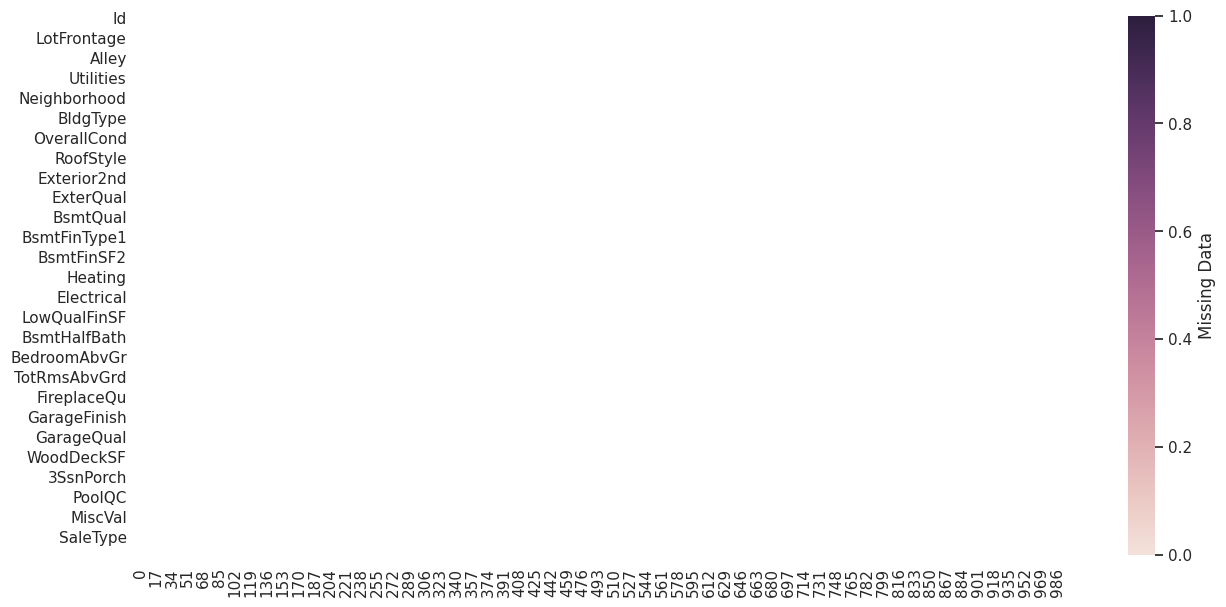

In [97]:
plt.figure(figsize = (15, 7))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(train.isna().transpose(), cmap = cmap, cbar_kws = {'label':'Missing Data'}, linewidth = 0.5)

In [98]:
display(train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

<Axes: >

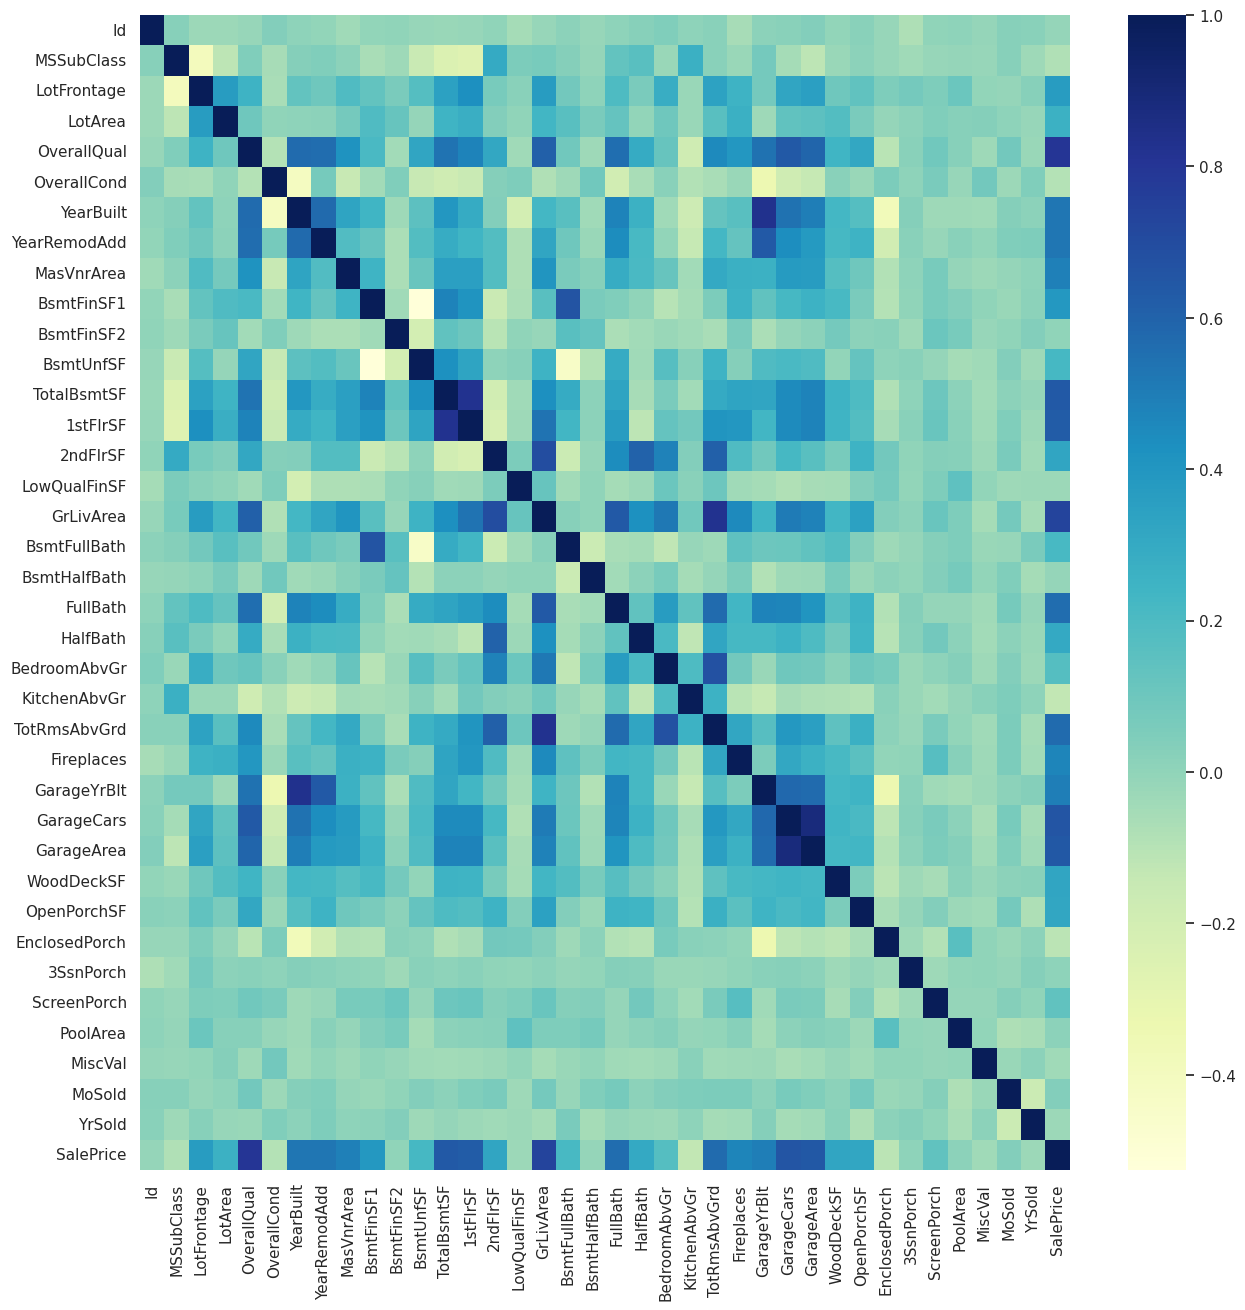

In [99]:
plt.figure(figsize=(15,15))
corr = train.corr()
sns.heatmap(corr, cmap = "YlGnBu")

In [100]:
train = train.dropna()

In [101]:
crr = train.corr()

In [102]:
category = train.loc[:, train.dtypes == object].columns
category

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [103]:
#произведем кодирование категорильаных данных с помощью LabelEncoder
from sklearn.preprocessing import LabelEncoder

categ = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

for i in categ:
  LE = LabelEncoder()
  train[i] = LE.fit_transform(train[i])
  test[i] = LE.fit_transform(test[i])

In [104]:
category1 = test.loc[:, test.dtypes == object].columns
category1

Index([], dtype='object')

In [105]:
#произведем кодирование категорильаных данных с помощью LabelEncoder
from sklearn.preprocessing import LabelEncoder

categ = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

for i in categ:
  LE = LabelEncoder()
  train[i] = LE.fit_transform(train[i])
  test[i] = LE.fit_transform(test[i])

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             0 non-null      int64  
 1   MSSubClass     0 non-null      int64  
 2   MSZoning       0 non-null      int64  
 3   LotFrontage    0 non-null      float64
 4   LotArea        0 non-null      int64  
 5   Street         0 non-null      int64  
 6   Alley          0 non-null      int64  
 7   LotShape       0 non-null      int64  
 8   LandContour    0 non-null      int64  
 9   Utilities      0 non-null      int64  
 10  LotConfig      0 non-null      int64  
 11  LandSlope      0 non-null      int64  
 12  Neighborhood   0 non-null      int64  
 13  Condition1     0 non-null      int64  
 14  Condition2     0 non-null      int64  
 15  BldgType       0 non-null      int64  
 16  HouseStyle     0 non-null      int64  
 17  OverallQual    0 non-null      int64  
 18  OverallCond    0 non-n

In [107]:
train = train.fillna(train.mean(axis=0), axis=0)
test = test.fillna(test.mean(axis=0), axis=0)

In [108]:
train.isna().sum().sum()

0.0

In [109]:
test.isna().sum().sum()

0

In [131]:
X = train.drop(columns=['SalePrice'])
Y = train['SalePrice']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

ValueError: ignored

In [147]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

NameError: ignored

In [148]:
print(mean_squared_error(y_test, y_pred))

NameError: ignored

In [149]:
y_pred_test = clf.predict(test)

y_pred_test

NotFittedError: ignored

In [150]:
y_pred_test = pd.DataFrame(data = y_pred_test, columns=['SalePrice'])

y_pred_test = y_pred_test.reset_index()

y_pred_test.to_csv('solution.csv', index = False)

NameError: ignored

In [151]:
test_id = test['Id']
df=pd.DataFrame({"SalePrice":y_pred_test},index = test_id)
df.to_csv('solution.csv')

NameError: ignored